In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import signal
import linecache

%matplotlib inline

font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

In [172]:
loc = 'C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Designs/EMG Sensor Cross Talk/Nora Trial/'
# file_name = '120252_SpeedBackDriveEval_08_05_2020'
# file_name = '140439_PositionalBackdrive_08_05_2020'
# file_name = '142129_BackdrivePostionVaringGains_08_05_2020'
# file_name = '144423_BackDriveBtnPress_08_05_2020'
folder_name = 'Forearm Placement/'
file_name = 'Nora Site 2 Forearm Trial 3'
extnd = '.csv'
input_file = loc + folder_name + file_name + extnd


df_raw = pd.read_csv(input_file, header=0, dtype=str)
print (df_raw.columns)

# fo = open(input_file,'r')
num_lines = len(df_raw)
print(num_lines)

print(df_raw.loc[0:5])

time = df_raw['time'].values
channel = df_raw['channel'].values
data_1 = df_raw['data 1'].values
data_2 = df_raw['data 2'].values

print(channel[5])

grasp_array = []
elbow_array = []
i = 0
y = 0

for x in range(1,len(channel)):
    if channel[x] == '@x':
        grasp_array.append(x)
    if channel[x] == '#x':
        elbow_array.append(x)
        
        
# for y in range(1,len(elbow_array)):
#     Bicep_data =data_2[] 

Bicep  = np.array(data_2[elbow_array])
Tricep = np.array(data_1[elbow_array])

Close = np.array(data_2[grasp_array])
Open  = np.array(data_1[grasp_array])
# print(Bicep)

Bicep  = Bicep.astype(np.float)
Tricep = Tricep.astype(np.float)

Close = Close.astype(np.float)
Open  = Open.astype(np.float)
Open = Open - 8

samples= len(Bicep)

t_up = np.linspace(0, len(Bicep), len(Bicep))
t_low = np.linspace(0, len(Close), len(Close))
# print(Bicep)

# Position = df_raw[0].values
# PWM = df_raw['PWM'].values
# MotPosDeg = df_raw['MotPosDeg'].values
# Temp = df_raw['Temp'].values


Index(['Unnamed: 0', 'time', 'channel', 'data 1', 'data 2', 'Unnamed: 5'], dtype='object')
1244
  Unnamed: 0     time channel data 1 data 2 Unnamed: 5
0         [0  00:06.1      @x   8.78   2.41        NaN
1         [0  00:06.1      #x   56.8  30.33        NaN
2         [0  00:06.1      @y     17     75        NaN
3         [0  00:06.1      #y     56     76        NaN
4         [0  00:06.1      @x   9.61   2.54        NaN
5         [0  00:06.1      #x  56.91   30.3        NaN
#x


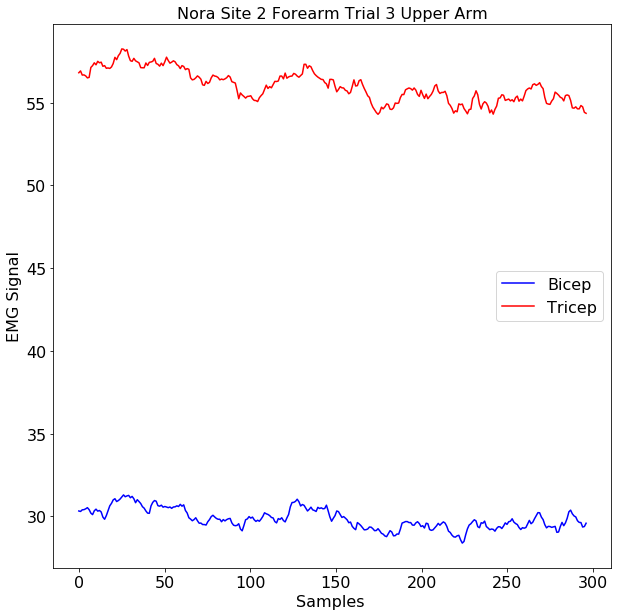

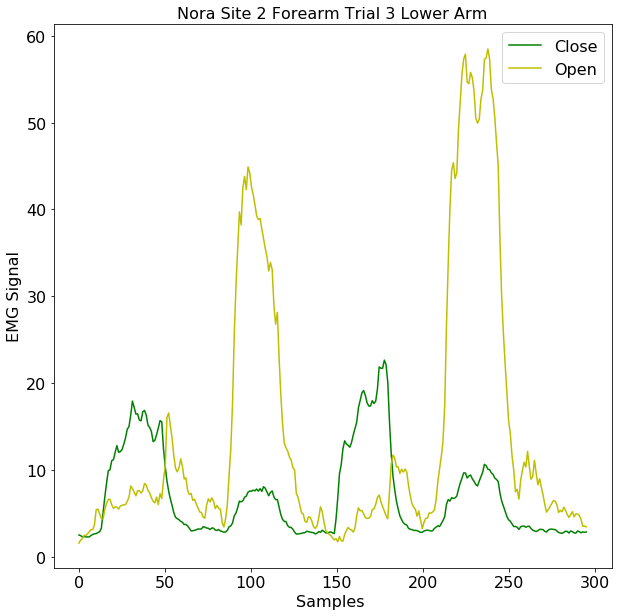

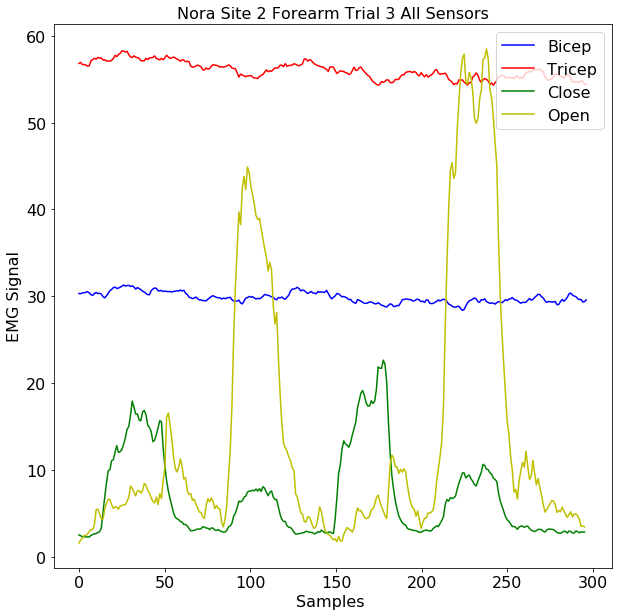

In [173]:
plt.figure(figsize=(10,10))
plt.plot(t_up,Bicep, 'b', label = 'Bicep')
plt.plot(t_up,Tricep, 'r', label = 'Tricep')
plt.xlabel('Samples ')
plt.ylabel('EMG Signal')
# plt.grid(color='k', linestyle='-', linewidth=2)
plt.title(file_name + ' Upper Arm', fontsize = 16)
# plt.xlim([4000,6000])
plt.legend()
# plt.ylim([0,35])


plt.figure(figsize=(10,10))
plt.plot(t_low,Close, 'g', label = 'Close')
plt.plot(t_low,Open, 'y', label = 'Open')
plt.xlabel('Samples ')
plt.ylabel('EMG Signal')
# plt.grid(color='k', linestyle='-', linewidth=2)
plt.title(file_name + ' Lower Arm', fontsize = 16)
# plt.xlim([4000,6000])
plt.legend()
# plt.ylim([0,35])


plt.figure(figsize=(10,10))
plt.plot(t_up,Bicep, 'b', label = 'Bicep')
plt.plot(t_up,Tricep, 'r', label = 'Tricep')
plt.plot(t_low,Close, 'g', label = 'Close')
plt.plot(t_low,Open, 'y', label = 'Open')
plt.xlabel('Samples ')
plt.ylabel('EMG Signal')
# plt.grid(color='k', linestyle='-', linewidth=2)
plt.title(file_name + ' All Sensors', fontsize = 16)
# plt.xlim([4000,6000])
plt.legend()
# plt.ylim([0,35])